In [1]:
#!pip install gmusicapi
# !pip install git+https://github.com/simon-weber/gmusicapi@develop
from gmusicapi import Mobileclient,Webclient,Musicmanager
from gmusicapi.utils import utils
print (utils.log_filepath)
import numpy as np
import pandas as pd
import scipy as sp
import tensorflow as tf
import keras as ks
from matplotlib import pyplot as plt
%matplotlib inline
import requests
import gensim
# !pip install tqdm
from tqdm import tqdm_notebook as tqdm
import sklearn as sk

import sklearn.preprocessing
import sklearn.ensemble

from sklearn import neural_network

import json

# !pip install python-vlc
import vlc

/Users/aduriseti/Library/Logs/gmusicapi/gmusicapi.log


Using TensorFlow backend.
/Users/aduriseti/anaconda/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
email = 'aduriseti@gmail.com'
pswd = 'ehshpxjlzaaoknix'

api = Mobileclient(debug_logging=False)
api.login(email,pswd,api.FROM_MAC_ADDRESS)
testsongid = 'T5jqqdgfclux2pzqyn5qwnyalaq'
# api.get_stream_url(testsongid)

In [5]:
for device in api.get_registered_devices():
    api.logout()
#     api.login(email,pswd,device['id'].replace(':',''))
    api.login(email,pswd,device['id'])
    try:
        api.get_stream_url(testsongid)
        print('DEVICE',device['id'],'AUTHORIZED')
        break
    except:
        print('DEVICE',device['id'],'NOT AUTHORIZED')

DEVICE ios:736804AE-FC53-4256-B0A8-AE6654382D33 AUTHORIZED


In [12]:
# disables google play
# p = vlc.MediaPlayer(api.get_stream_url(testsongid))
# p.play()

0

In [13]:
# get all songs associated with account
songs = api.get_all_songs()
playlists = api.get_all_playlists()
playlist_content = api.get_all_user_playlist_contents()
stations = api.get_all_stations()
allsongs_name = 'allsongs'
allsongs_id = ([None]+[p['id'] for p in playlists if p['name'] == allsongs_name])[0]
ids = []
ids += [s['id'] for s in songs]
print('PLAYLIST')
for p in tqdm(playlist_content):
    ids += [s['id'] for s in p['tracks']]
print('STATIONS')
for s in tqdm(stations):
#     ids = list(set(ids))
    tracks = api.get_station_tracks(s['id'],num_tracks=200)
    ids += [t['storeId'] for t in tracks]

PLAYLIST

STATIONS



In [14]:
uids = list(set(ids))
len(ids),len(uids)

(6740, 6615)

In [15]:
queues_format_filename = 'queues_v0.json'
try:
    with open(queues_format_filename) as queuesfile:
        queues = json.load(queuesfile)
except:
    queues = []

In [16]:
temp_nm = 'temp'
temp_ids = [s['id'] for s in api.get_all_stations() if s['name']==temp_nm]
mdkeys = ('title','artist','genre','year')
idkeys = ('id','storeId','nid')
if temp_ids: api.delete_stations(temp_ids)
for ID in tqdm(uids[:]):
    temp_id = api.create_station(name=temp_nm,track_id=ID)
    tracks = api.get_station_tracks(station_id=temp_id,num_tracks=200)
#     print(len(tracks))
    queues.append([([t[mdkey] if mdkey in t else None for mdkey in mdkeys],
                    [t[idkey] for idkey in idkeys if idkey in t][0]) 
                   for t in tracks])
    api.delete_stations(temp_id)

ConnectionError: ('Connection aborted.', OSError("(60, 'ETIMEDOUT')",))

In [ ]:
try:
    with open(queues_format_filename,'w') as queuesfile:
        json.dump(queues,queuesfile)
except:
    print('SUCKS TO SUCK')

In [ ]:
len(queues)

In [ ]:
queues_md,queues_id = list(zip(*[list(zip(*q)) for q in queues if q]))

53230

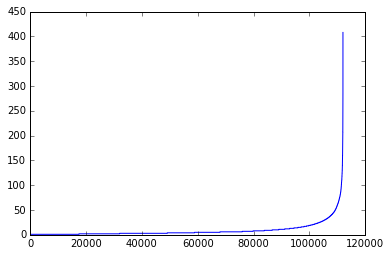

In [362]:
cdict = {}
for q in queues_id:
    for sid in q:
        if sid not in cdict:
            cdict[sid] =0
        cdict[sid] += 1        

plt.plot(sorted(v for k,v in cdict.items()))
sum(1 for sid,c in cdict.items() if c >= 5)

In [ ]:
sids = list(set(sid for q in queues_id for sid in q))
sid2md = dict((sid,md) for q in queues for md,sid in q)

genres = set(md[2] for q in queues_md for md in q)
idx2genre = dict(enumerate(genres))
genre2idx = dict((g,i) for i,g in enumerate(genres))

In [375]:
len(genres)

156